## Bresenham algorithm in Python/Cython

The code is in Cython.
To convert it to pure python, remove *%%cython -a*, *@cython.locals* and *cimport* commands, and replace *cpdef* by *def. Then, it will work fine in Python (but slower)

In [1]:
%matplotlib inline
%load_ext cython

In [4]:
%%cython -a
from math import pi
import numpy as np

import cython
cimport numpy as cnp
from libc.math cimport sin,cos
from libc.stdlib cimport abs

ctypedef cnp.int_t [:,:] myarray

@cython.locals(x=cython.int,y=cython.int,x2=cython.int,y2=cython.int,\
               w=cython.int,h=cython.int,steep=cython.int,i=cython.int,\
               sx=cython.int,sy=cython.int,d=cython.int,dx=cython.int,dy=cython.int,T=myarray)

@cython.nonecheck(False)
@cython.boundscheck(False)
@cython.wraparound(False)
@cython.initializedcheck(False) # do not check that memory views are initialized

# bresenham algorithm cropped in the window (0,0,w,h)
cdef line(T,x,y,x2,y2,w,h):

    steep = 0
    dx = abs(x2 - x)
    dy = abs(y2 - y)
    if (x2 - x) > 0: sx = 1
    else: sx = -1
    
    if (y2 - y) > 0: sy = 1
    else: sy = -1

    if dy > dx:
        steep = 1
        x,y = y,x
        dx,dy = dy,dx
        sx,sy = sy,sx
        w,h   = h,w

    d = (2 * dy) - dx

    i = 0
    while x >= 0 and y >= 0 and x < w and y < h and i <= dx:
        if steep: T[y,x] = 1
        else: T[x,y] = 1

        while d >= 0:
            y = y + sy
            d = d - (2 * dx)
        
        x += sx
        d += 2 * dy
        i += 1

@cython.locals(x=cython.int,y=cython.int,angle=cython.float,w=cython.int,h=cython.int)

def rayon(T,x,y,angle,w,h):
    dx = cos(angle)*(w+h)
    dy = sin(angle)*(w+h)
    line(T,x,y,int(x+dx),int(y+dy),w,h)


In [5]:
import numpy as np

w,h = 200,200
T = np.zeros((w,h),dtype=np.int)
for angle in np.linspace(0,2*pi-0.1,50):
    rayon(T,w/2,h/2,angle,w,h)


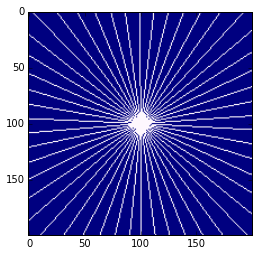

In [6]:
import matplotlib.pyplot as plt
plt.imshow(T,cmap='gist_ncar')
plt.show()